In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import config
from utils import visualize_X_samples_grid

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl
import matplotlib.pyplot as plt
torch.set_float32_matmul_precision('medium')

log_level: WARNING
fast_dev_run: false
overfit_batches: 0.0
dirs:
  data: /home/stud/ath/ath_ws/others/pixel_art_generator/data
  output: /home/stud/ath/ath_ws/keypoint_matcher/output
  output_test_images: ${dirs.output}/test_images
  output_val_images: ${dirs.output}/val_images
image_size: 16
train:
  train_batch_size: 256
  val_batch_size: 256
  seed: 42
  save_image_epochs: 5
  patience: 4
  max_epochs: 20
  check_val_every_n_epoch: 2
  num_sanity_val_steps: 1
  log_every_n_steps: 25
  accumulate_grad_batches: 2
  learning_rate: 0.0001
  lr_warmup_steps: 500
test:
  batch_size: 16



# Check Data Module

In [3]:
from dataset import SpriteDataModule
dm = SpriteDataModule()
dm.setup(stage='fit')

In [4]:
dl = dm.train_dataloader()
batch = next(iter(dl))

In [5]:
images, labels = batch
images.shape, labels.shape

(torch.Size([256, 3, 16, 16]), torch.Size([256, 5]))

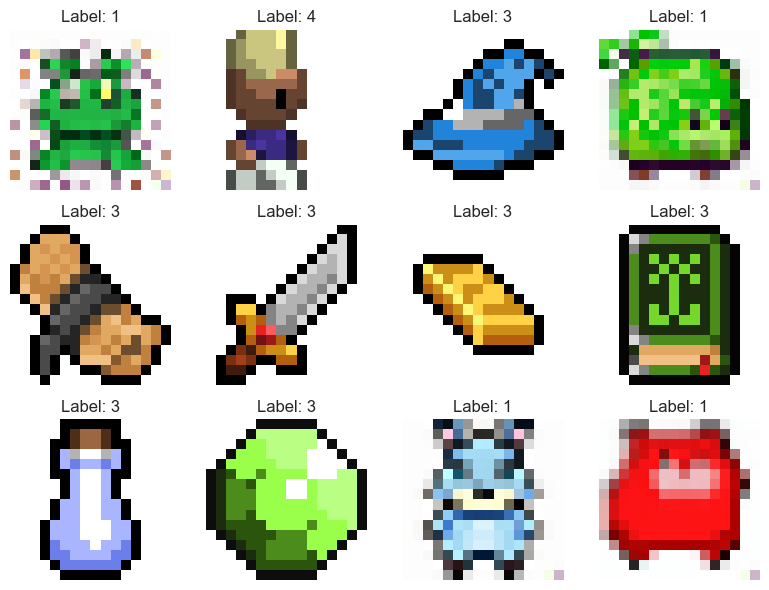

In [6]:
visualize_X_samples_grid(images, labels)

In [9]:
ims = np.load('./output/test_images/2024-11-06 13:42:10.npy')
ims.shape

(16, 3, 16, 16)

In [ ]:
visualize_X_samples_grid(images, labels)